# Identitas

Nama: **Steven Soewignjo**

NIM: **082011833060**

No. Peserta: **070**

Universitas: **Universitas Airlangga**

Program Studi: **S1-Statistika**

# REGRESI DATA HARGA RUMAH

## Import Libraries and Data

In [67]:
# Importing library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

In [68]:
# Import data
df = pd.read_csv('train.csv')

In [17]:
# Preview data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preparation

### Data Cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Berdasarkan dari output tersebut, terdapat banyak variabel kategorikal, sehingga perlu melakukan seleksi terhadap variabel yang akan digunakan dalam analisis ini.

In [69]:
# Check for missing values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Output tersebut menunjukkan bahwa terdapat missing value dalam data, sehingga perlu dilakukan missing value handling.

In [21]:
# Dropping NA value
df = df.dropna(axis=1)

### Ekstrak data
Langkah selanjutnya adalah memisahkan variabel numerik dan kategorikal untuk pemilihan variabel terbaik yang sekiranya memiliki korelasi yang kuat dengan variabel target, khususnya pada variabel kategorik.

In [26]:
# Extract numerical features
df_num = df.select_dtypes(include=[np.number])

# View numerical features
df_num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [27]:
# Dropping irrelevant features in numerical features
df_num = df_num.drop(['Id', 'MSSubClass', 'MoSold', 'YrSold', 'MiscVal'], axis=1)
df_num.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,8450,7,5,2003,2003,706,0,150,856,856,...,0,2,548,0,61,0,0,0,0,208500
1,9600,6,8,1976,1976,978,0,284,1262,1262,...,1,2,460,298,0,0,0,0,0,181500
2,11250,7,5,2001,2002,486,0,434,920,920,...,1,2,608,0,42,0,0,0,0,223500
3,9550,7,5,1915,1970,216,0,540,756,961,...,1,3,642,0,35,272,0,0,0,140000
4,14260,8,5,2000,2000,655,0,490,1145,1145,...,1,3,836,192,84,0,0,0,0,250000


In [23]:
# Getting most relevant categorical data to SalePrice
df.select_dtypes(include=[np.object]).columns

C:\Users\Steven\AppData\Local\Temp\ipykernel_15392\3486411052.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.select_dtypes(include=[np.object]).columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

Variabel kategorikal yang mungkin relevan dan berkorelasi tinggi dengan SalePrice atau harga penjualan rumah adalah sebagai berikut:
1. LandContour: Flatness of the property
2. Utilities: Type of utilities available
3. HouseStyle: Style of dwelling
4. Heating: Type of heating
5. CentralAir: Central air conditioning

In [31]:
# Saving selected categorical variables
df_cat = df[['LandContour', 'Utilities', 'HouseStyle', 'Heating', 'CentralAir']]
df_cat.head()

,LandContour,Utilities,HouseStyle,Heating,CentralAir
0,Lvl,AllPub,2Story,GasA,Y
1,Lvl,AllPub,1Story,GasA,Y
2,Lvl,AllPub,2Story,GasA,Y
3,Lvl,AllPub,2Story,GasA,Y
4,Lvl,AllPub,2Story,GasA,Y


Setelah memperoleh variabel kategorikal, selanjutnya adalah melakukan One Hot Encoding untuk mengubah variabel numerik tersebut menjadi variabel dummy.

In [32]:
# Convert categorical data to numerical data with One Hot Encoding as Dummy Variables
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,...,HouseStyle_SFoyer,HouseStyle_SLvl,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


Setelah memperoleh variabel kategorikal yang mungkin relevan, selanjutnya adalah melakukan menggabungkan kedua jenis data tersebut untuk memperoleh data yang lengkap pada analisis.

In [70]:
# Combine numerical and categorical data
df = pd.concat([df_num, df_cat], axis=1)
df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HouseStyle_SFoyer,HouseStyle_SLvl,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y
0,8450,7,5,2003,2003,706,0,150,856,856,...,0,0,0,1,0,0,0,0,0,1
1,9600,6,8,1976,1976,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,0,1
2,11250,7,5,2001,2002,486,0,434,920,920,...,0,0,0,1,0,0,0,0,0,1
3,9550,7,5,1915,1970,216,0,540,756,961,...,0,0,0,1,0,0,0,0,0,1
4,14260,8,5,2000,2000,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,0,1


## Membuat Model Regresi

### Memisahkan variabel independen dan dependen

In [34]:
# Split target variable from input features
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

### Membagi data menjadi data training dan data testing

Data training akan digunakan untuk membuat model regresi, sedangkan data testing akan digunakan untuk menguji model regresi yang telah dibuat. Pada analisis ini, proporsi untuk data training adalah 80% dan data testing adalah 20%.

In [39]:
# Size of train data is 80% and test data is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Setelah membagi data, langkah selanjutnya adalah feature selection dengan menggunakan metode Backward Elimination dan dievaluasi dengan menggunakan nilai R-square.

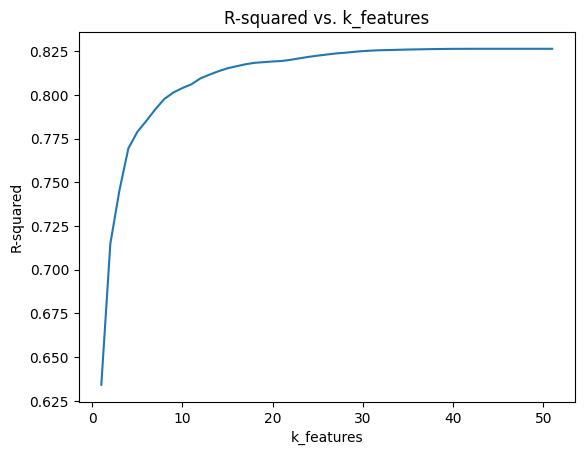

Max R-squared: 0.8263433515979424
Corresponding k_features: ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_OthW', 'Heating_Wall', 'CentralAir_N']


In [43]:
# Feature selection for the best features

# Define the range of k_features
k_features_range = range(1, len(X_train.columns) + 1)

# Initialize lists to store R-squared values
r_squared_values = []
max_r_squared = -np.inf
best_k_features = []

# Iterate over different values of k_features
for k in k_features_range:
    # Create the SequentialFeatureSelector
    sfs = SequentialFeatureSelector(LinearRegression(), k_features=k, forward=False, scoring='r2', cv=None)
    
    # Fit the selector and extract selected features
    selected_features = sfs.fit(X_train, y_train)
    
    # Redefine X with only selected features
    X_selected = X_train[list(selected_features.k_feature_names_)]
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_selected, y_train)
    
    # Calculate R-squared
    r_sq = model.score(X_selected, y_train)
    if r_sq > max_r_squared:
        max_r_squared = r_sq
        best_k_features = list(selected_features.k_feature_names_)
    
    # Store the R-squared value
    r_squared_values.append(r_sq)

# Plot the chart
plt.plot(k_features_range, r_squared_values)
plt.xlabel('k_features')
plt.ylabel('R-squared')
plt.title('R-squared vs. k_features')
plt.show()

print(f"Max R-squared: {max_r_squared}")
print(f"Corresponding k_features: {best_k_features}")

Berdasarkan plot dan output yang dihasilkan, diperoleh bahwa semakin banyak jumlah variabel input, semakin besar pula nilai R-squarenya. Dengan perubahan nilai R-square yang signifikan pada saat variabel input berjumlah 1 hingga 15. Dan nilai R-square tertinggi yaitu 0.8263. 

### Memodelkan Regresi dan evaluasi akurasi model

In [66]:
# Redefine X with only selected features
X_selected = X_train[best_k_features]

# Creaiting multiple linear regression model
model = LinearRegression()
model.fit(X_selected, y_train)

# Regression coefficient
print(f"intercept (B0): {model.intercept_}")
print(f"Regression coefficient (B1, ..., Bp):\n {model.coef_}")

# Metric evaluation using R-squared
r_sq = model.score(X_selected, y_train)
mape = mean_absolute_percentage_error(y_train, model.predict(X_selected))

# Output the metric
print(f"Coefficient of determination: {round(r_sq, 2)}")
print(f"MAPE: {round(100*mape, 2)} %")


intercept (B0): -970258.1260248602
Regression coefficient (B1, ..., Bp):
 [ 4.08032849e-01  1.78894876e+04  5.42020831e+03  3.00587986e+02
  1.30323422e+02  1.43965811e+01  3.71034052e+00  9.04105469e+00
 -2.75768708e+01  4.11490289e+00  6.98683359e+01  7.12375108e+03
 -3.42296446e+03  3.05698166e+03  2.76830414e+03 -7.76495750e+03
 -2.53899908e+04  6.39060833e+03  3.77730381e+03  1.16903479e+04
 -3.08390522e+00  2.79452550e+01  2.76313087e+01  1.58799069e+01
  1.97785414e+01  3.80422558e+01 -1.26334109e+02  2.89586732e+04
  1.89686247e+04  8.50775537e+03  2.26428910e+04  4.66882196e+04
  4.72882690e+04 -1.73612930e+04  1.03454025e+04  4.13575591e+04
  3.86836608e+04  1.84575791e+04 -5.29930750e+03 -1.44115458e+04
 -6.84282039e+04  1.91420967e+04  1.06794879e+04]
Coefficient of determination: 0.83
MAPE: 12.15 %


Berdasarkan hasil regresi tersebut, telah diperoleh nilai R-square sebesar 83%, yang artinya sebanyak 83% variabel target dapat dijelaskan oleh variabel input yang telah terpilih sebelumnya dengan nilai koefisien regresi yang bersesuaian. Nilai Mean-Absolute-Percentage-Error yang dihasilkan juga cukup kecil, yaitu 12.15% yang baik (antara 10% - 20%). Untuk melihat lebih jelas terkait hasil prediksi, dapat dilihat pada plot berikut.

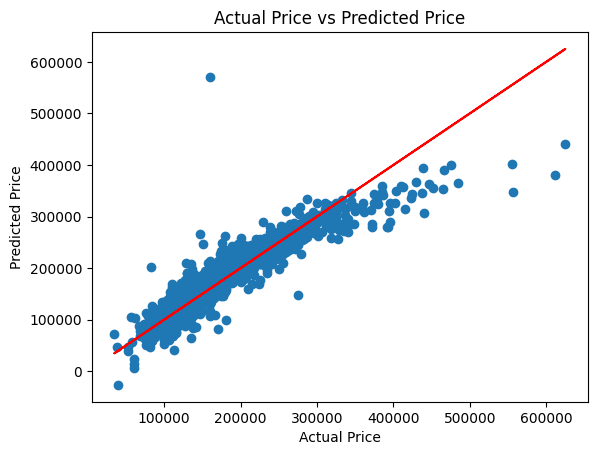

In [64]:
# Plotting the predicted vs actual values with line
plt.scatter(y_train, model.predict(X_selected))
plt.plot(y_train, y_train, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()


Plot tersebut menunjukkan bahwa banyak data yang terprediksi dengan baik, namun terdapat beberapa data yang memiliki error yang cukup besar. Hal ini dapat dilihat dari data yang berada di atas dan di bawah garis merah. Hal ini dapat disebabkan oleh beberapa faktor, seperti data yang tidak lengkap, data yang tidak terdistribusi normal, atau model yang tidak sesuai. Untuk data yang berada di sekitar garis merah memiliki arti bahwa model sudah mampu untuk memprediksi dengan baik.

### Pengujian Model pada Data Testing

Setelah diperoleh model regresi yang sebelumnya diperoleh dari data train, langkah selanjutnya adalah melihat kemampuan model untuk memprediksi data yang berada diluar data train. Hal ini dilakukan dengan menggunakan data testing yang telah dipisahkan sebelumnya.

In [63]:
# Predict test data
y_pred = model.predict(X_test[best_k_features])

In [60]:
# Metric evaluation using R-squared and MAPE
r_sq = model.score(X_test[best_k_features], y_test)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Coefficient of determination: {round(r_sq, 3)}")
print(f"MAPE: {round(100*mape, 2)} %")

Coefficient of determination: 0.774
MAPE: 13.33 %


Berdasarkan hasil prediksi pada data testing dengan model regresi yang telah dibuat sebelumnya, diperoleh nilai R square sbeesar 0.774 atau 77.4%. Hal ini menunjukkan bahwa variabel target yang dapat dijelaskan oleh variabel input sebesar 77.4%. Nilai ini lebih rendah dibandingkan dengan nilai R square pada data train, yang artinya model regresi yang dibuat sebelumnya tidak dapat memprediksi data testing dengan baik, namun tetap memprediksi secara akurat. Selain itu, nilai Mean-Absolute-Percentage-Error yang dihasilkan juga cukup kecil, yaitu 13.33% yang baik (antara 10% - 20%). Untuk melihat lebih jelas terkait hasil prediksi, dapat dilihat pada plot berikut.

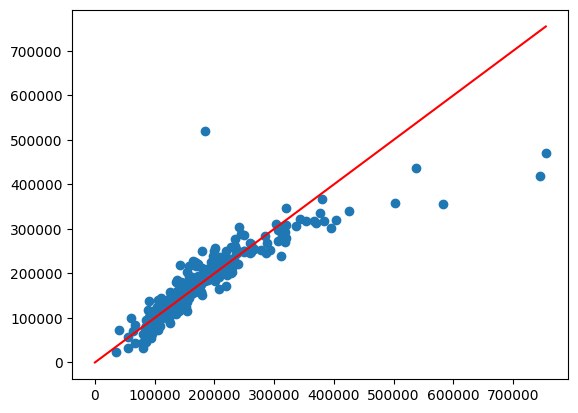

In [62]:
# Plot the predicted vs actual values with line
plt.scatter(y_test, y_pred)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red')

Berdasarkan plot tersebut, terlihat cukup banyak titik yang berada di sekitar garis merah dan mengikuti garis merah secara linear. Berdasarkan hasil tersebut, dapat dijelaskan bahwa model regresi yang telah dibuat dapat memprediksi rumah yang harganya dibawah 400000 secara baik, namun untuk rumah yang harganya diatas harga tersebut, model regresi tidak dapat memprediksi dengan baik. Hal ini dapat disebabkan oleh beberapa faktor, seperti data yang tidak lengkap, data yang tidak terdistribusi normal, atau model yang tidak sesuai.

# Unsupervised Learning: Clustering

In [73]:
# Import Libraries
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [72]:
# Import data
df_customer = pd.read_csv('Mall_Customers.csv')
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [75]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Berdasarkan output tersebut, dataset Mall Customers memiliki 5 feature, yaitu:
1. CustomerID: Merupakan nomor identitas pelanggan yang unik untuk tiap pelanggan.
2. Gender: Merupakan jenis kelamin dari pelanggan.
3. Age: Merupakan usia dari pelanggan.
4. Annual Income (k$): Merupakan pendapatan tahunan dari pelanggan dalam ribuan dollar.
5. Spending Score (1-100): Merupakan skor yang diberikan kepada pelanggan berdasarkan perilaku pembelian dan pengeluaran dengan rentang skor 1-100.

Dari kelima variabel tersebut, variabel yang merupakan kategorik adalah variabel CustomerID dan Gender, sedangkan variabel yang merupakan numerik adalah variabel Age, Annual Income (k$), dan Spending Score (1-100).

In [77]:
# Melihat nilai missing
df_customer.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Berdasarkan output tersebut, tidak terdapat nilai missing value pada dataset Mall Customers.

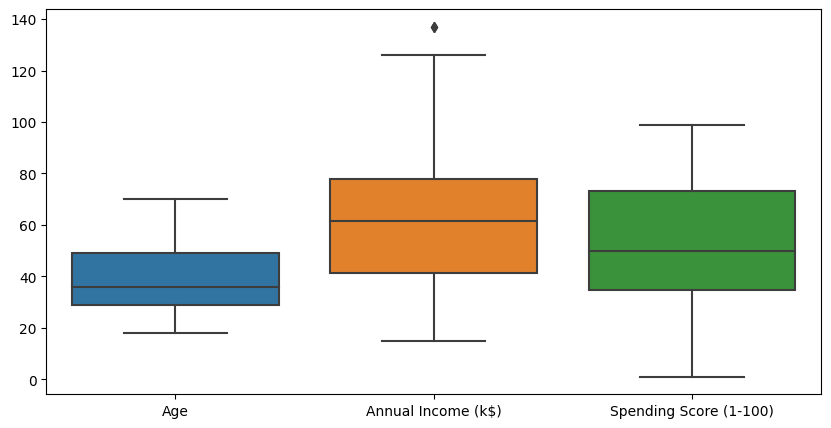

In [79]:
# Boxplot untuk melihat outlier pada data
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_customer.drop('CustomerID', axis=1))
plt.show()

Berdasarkan plot tersebut, hanya ditemukan outlier pada variabel Annual Income dengan terdapat titik yang berada di atas garis whisker. Sehingga kita perlu menghapus outlier tersebut supaya dapat menghasilkan klasterisasi yang baik.

In [82]:
# Menghapus outlier
# Get the 1st and 3rd quartiles
q1, q3 = df_customer['Annual Income (k$)'].quantile([0.25, 0.75])

# Calculate the interquartile range
iqr = q3 - q1

# Define the upper and lower bounds for outliers
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Get the outliers dengan memilih data yang berada diluar batas atas dan batas bawah yang memiliki nilai Chuurn = Yes
outliers = df_customer.loc[(df_customer['Annual Income (k$)'] <= lower_bound) | (df_customer['Annual Income (k$)'] >= upper_bound)]
df_customer = df_customer.drop(outliers.index, axis=0)

df_customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


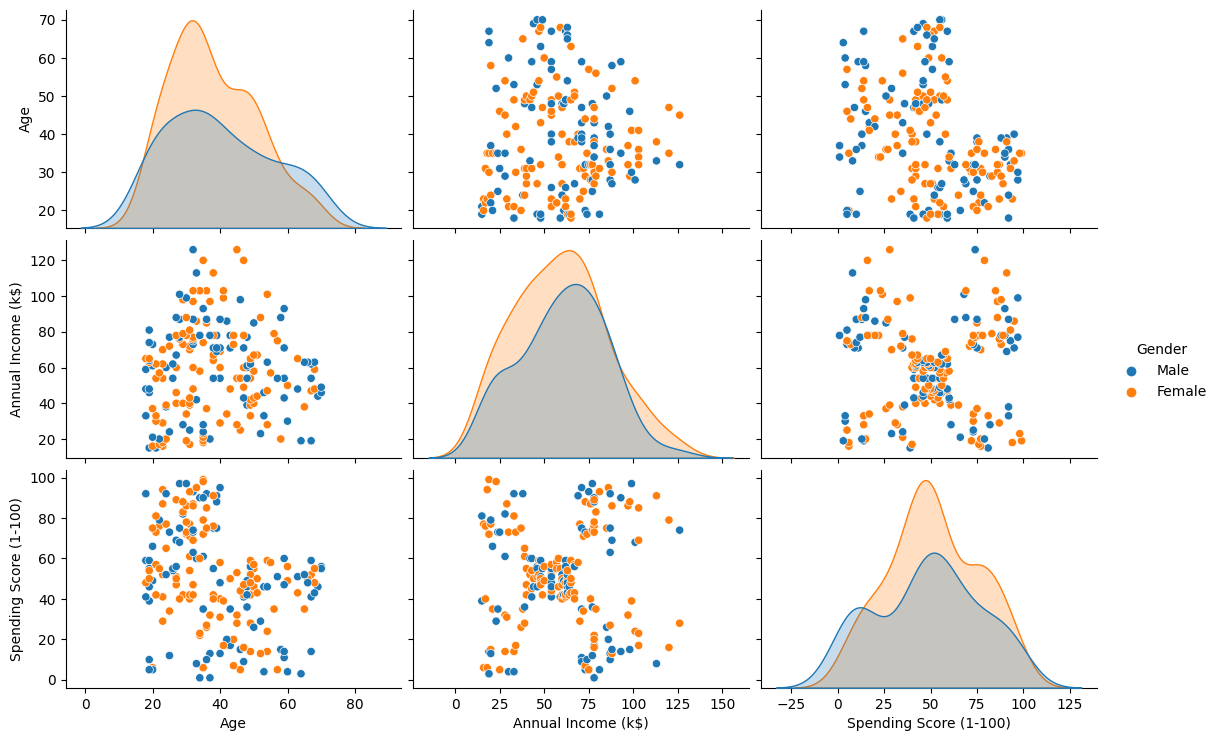

In [83]:
# Melihat dataset lebih jelas dengan pairplot untuk melihat hubungan antar variabel
sns.pairplot(df_customer.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

Secara sekilas, seluruh variabel numerik dalam data tersebut mengikuti distribusi normal, baik untuk jenis kelamin laki-laki maupun perempuan. Sedangkan untuk hubungan antar variabel menunjukkan bahwa terdapat pola tersendiri antar variabel.

Pada variabel Umur dengan Annual Income, umur yang rendah cenderung memiliki penghasilan tahunan yang rendah dibandingkan umur yang tinggi. Sedangkan untuk variabel Umur dengan Spending Score, umur yang rendah cenderung memiliki spending score yang tinggi dibandingkan umur yang tinggi. Untuk variabel Annual Income dengan Spending Score, penghasilan tahunan yang rendah cenderung memiliki spending score yang tinggi dibandingkan penghasilan tahunan yang tinggi.

Selain itu, jenis kelamin tersebut tidak menunjukkan pola yang jelas terhadap variabel lainnya, sehingga kita dapat mengdrop variabel tersebut. Sehingga variabel yang digunakan dalam klasterisasi adalah variabel Umur, Annual Income, dan Spending Score.

In [88]:
# Drop irrelevant variable
df_customer = df_customer.drop(['CustomerID', 'Gender'], axis=1)

## Membuat Model Klasterisasi

c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

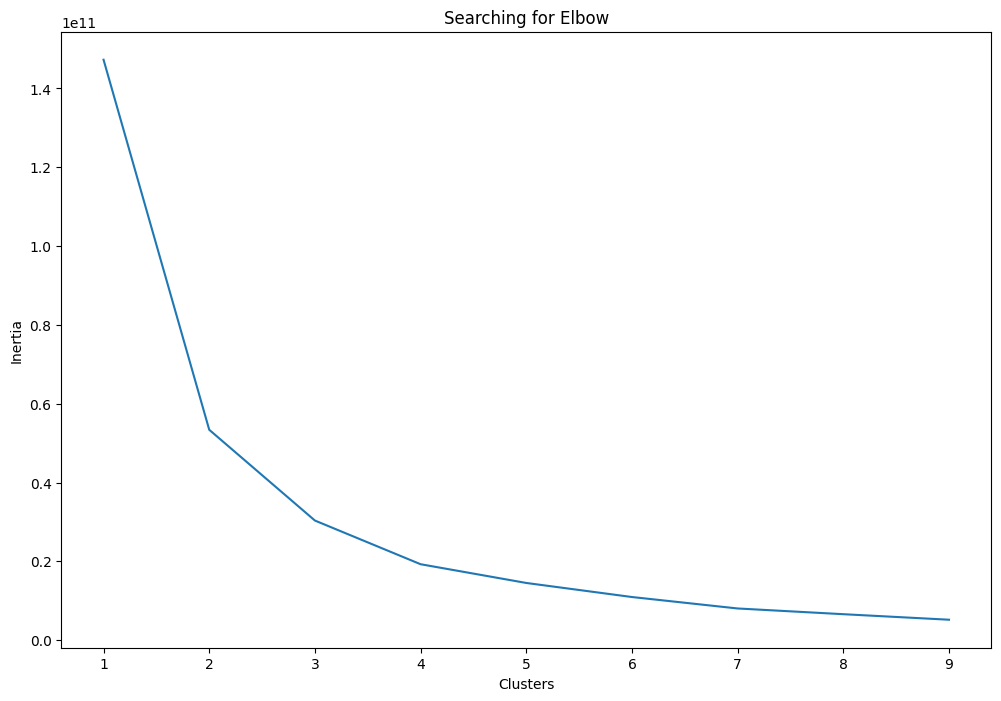

In [89]:
from sklearn.cluster import KMeans

# Mendefinisikan variabel clusters untuk menyimpan nilai inersia dengan tujuan untuk memperoleh kriteria cluster yang diinginkan
clusters = []

# Iterasi dari cluster berjumlah 1 hingga 5
for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(df_customer)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

Pemilihan jumlah cluster yang baik dilakukan dengan cara mencari titik elbow atau titik berubah signifikan pada nilai inertia. Pada plot tersebut, titik elbow terdapat pada jumlah cluster 3 dan 5.

#### Jumlah Cluster = 3

c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


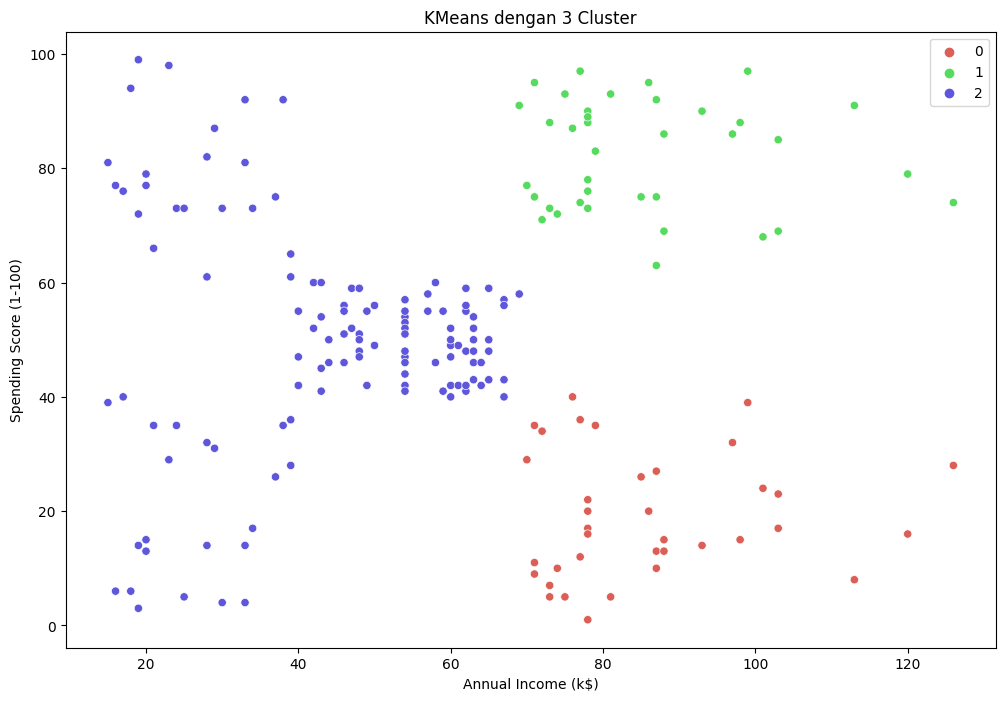

In [99]:
# Membuat model KMeans dengan jumlah cluster 3 untuk dataset df_custoemr
km3 = KMeans(n_clusters=3).fit(df_customer)

# Membuat ukuran figure atau gambar
plt.figure(figsize=(12, 8))

# Membuat scatterplot dengan variabel x adalah Annual Income dan variabel y adalah Spending Score dengan pembeda warna titik berdasarkan label KMeans 3
sns.scatterplot(x = df_customer['Annual Income (k$)'], y = df_customer['Spending Score (1-100)'], hue = km3.labels_, 
                palette=sns.color_palette('hls', 3))

# Membuat judul plot / gambar
plt.title('KMeans dengan 3 Cluster')
plt.show()

#### Jumlah Cluster = 5

c:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


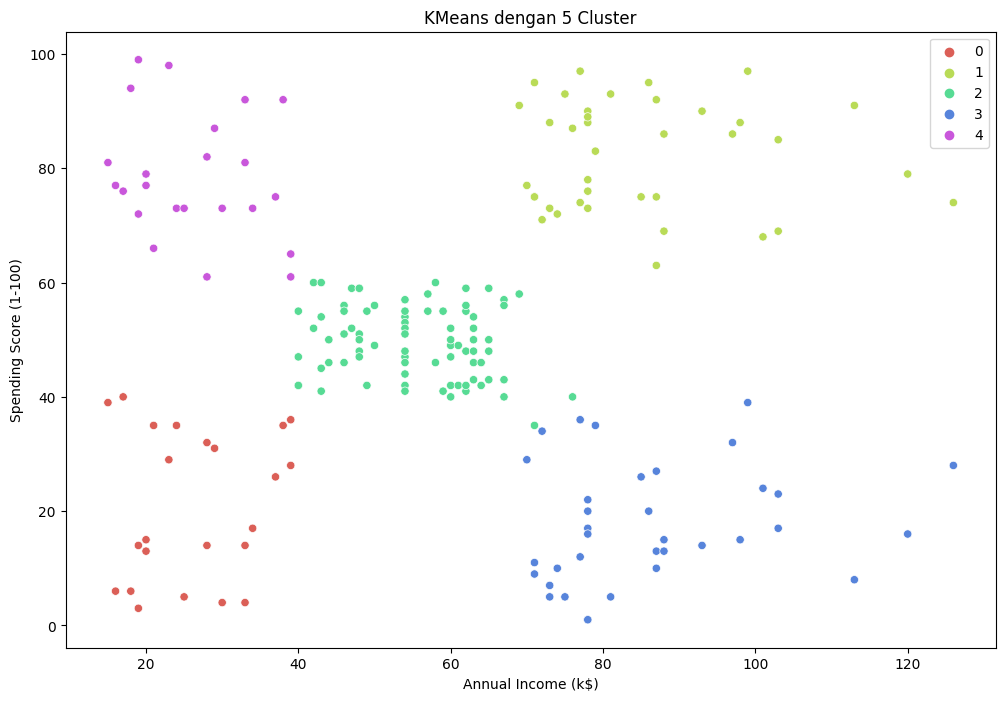

In [100]:
# Membuat model KMeans dengan jumlah cluster 3 untuk dataset df_custoemr
km5 = KMeans(n_clusters=5).fit(df_customer)

# Membuat ukuran figure atau gambar
plt.figure(figsize=(12, 8))

# Membuat scatterplot dengan variabel x adalah Annual Income dan variabel y adalah Spending Score dengan pembeda warna titik berdasarkan label KMeans 3
sns.scatterplot(x = df_customer['Annual Income (k$)'], y = df_customer['Spending Score (1-100)'], hue = km5.labels_, 
                palette=sns.color_palette('hls', 5))

# Membuat judul plot / gambar
plt.title('KMeans dengan 5 Cluster')
plt.show()

Berdasarkan hasil output plot yang telah dihasilkan dari KMeans 3 cluster dan 5 cluster, KMeans dengan 5 cluster lebih baik dibandingkan dengan KMeans 3 cluster berdasarkan persebaran pola data pada scatterplot. Dengan klasifikasi berikut, kita dapat memperoleh informasi statistik dari tiap cluster sebagai berikut:

In [102]:
# Get the cluster centers
cluster_centers = km5.cluster_centers_

# Display the characteristics of each cluster
cluster_character = pd.DataFrame(data=cluster_centers, columns=[df_customer.columns])
cluster_character

,Age,Annual Income (k$),Spending Score (1-100)
0,45.217391,26.304348,20.913043
1,32.763158,85.210526,82.105263
2,43.088608,55.291139,49.569620
3,40.914286,86.342857,17.571429
4,25.521739,26.304348,78.565217


Berdasarkan karakteristik tersebut, dapat dijelaskan sebagai berikut:
1. Cluster 0: Penghasilan dan pengeluaran kecil
2. Cluster 1: Penghasilan besar dengan pengeluaran yang besar
3. Cluster 2: Penghasilan menengah dengan pengeluaran menengah
4. Cluster 3: Penghasilan besar dengan pengeluaran yang kecil
5. Cluster 4: Penghasilan kecil dengan pengeluaran yang besar

<Axes: ylabel='count'>

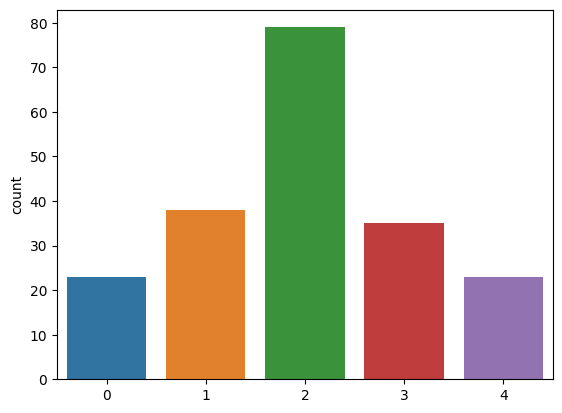

In [103]:
# Melihat jumlah pelanggan pada tiap cluster
sns.countplot(data=df_customer,x=km5.labels_)

Berdasarkan plot tersebut, hasil clusterisasi menunjukkan bahwa jumlah pelanggan pada tiap cluster membentuk distribusi normal dengan pelanggan terbanyak terdapat pada cluster 2, dimana pelanggan yang memiliki penghasilan menengah dengan pengeluaran yang menengah.